In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #set date as index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #set date as index

In [2]:
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
X_train.shape

(384, 8)

In [3]:
y_train = mytrainingdata['Max_Demand_GW']
y_train.shape

(384,)

In [4]:
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
X_test.shape

(96, 8)

In [5]:
y_test = mytestdata['Max_Demand_GW']
y_test.shape

(96,)

In [6]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="absolute_error",
                            splitter="best",
                           max_depth=10,
                           min_samples_split=10,
                           random_state=5)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

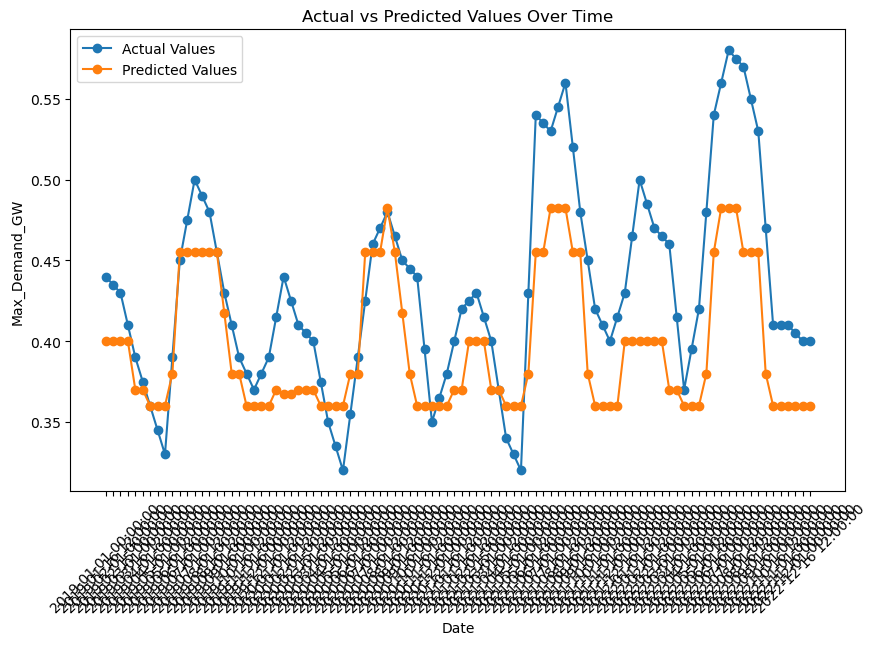

In [7]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max_Demand_GW')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')

R-squared: 0.3536 (Ideal: 1)
Mean Absolute Error: 0.0413 (Ideal: 0)
Mean Squared Error: 0.0025 (Ideal: 0)
Root Mean Squared Error: 0.0499 (Ideal: 0)
Explained Variance Score: 0.6794 (Ideal: 1)


# Cross Validation

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from numpy import absolute

# Training model cross-validation
score_train_decision_tree = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

print("Cross-validation scores for Decision Tree on training data:")
print(score_train_decision_tree)

# The absolute mean score
print("Mean Absolute Cross-validation Score on training data:", absolute(np.mean(score_train_decision_tree)))

# Testing model cross-validation
score_test_decision_tree = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=10)

print("\nCross-validation scores for Decision Tree on test data:")
print(score_test_decision_tree)
print("Mean Absolute Cross-validation Score on test data:", absolute(np.mean(score_test_decision_tree)))


Cross-validation scores for Decision Tree on training data:
[-0.00050513 -0.00039551 -0.00057564 -0.00061603 -0.00029539 -0.00027237
 -0.00040263 -0.00048947 -0.00063553 -0.00283421]
Mean Absolute Cross-validation Score on training data: 0.0007021912955465587

Cross-validation scores for Decision Tree on test data:
[-0.000805   -0.001135   -0.0008875  -0.0037775  -0.00066    -0.0023275
 -0.00088056 -0.00141389 -0.00175278 -0.00955833]
Mean Absolute Cross-validation Score on test data: 0.0023198055555555563


# Hyperparameter Tuning

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],  # None allows unlimited depth
    'min_samples_split': [2, 5, 10, 15],
    'random_state': [5]
}


# Create the decision tree regressor
reg = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

Best Hyperparameters: {'criterion': 'poisson', 'max_depth': 15, 'min_samples_split': 15, 'random_state': 5, 'splitter': 'best'}


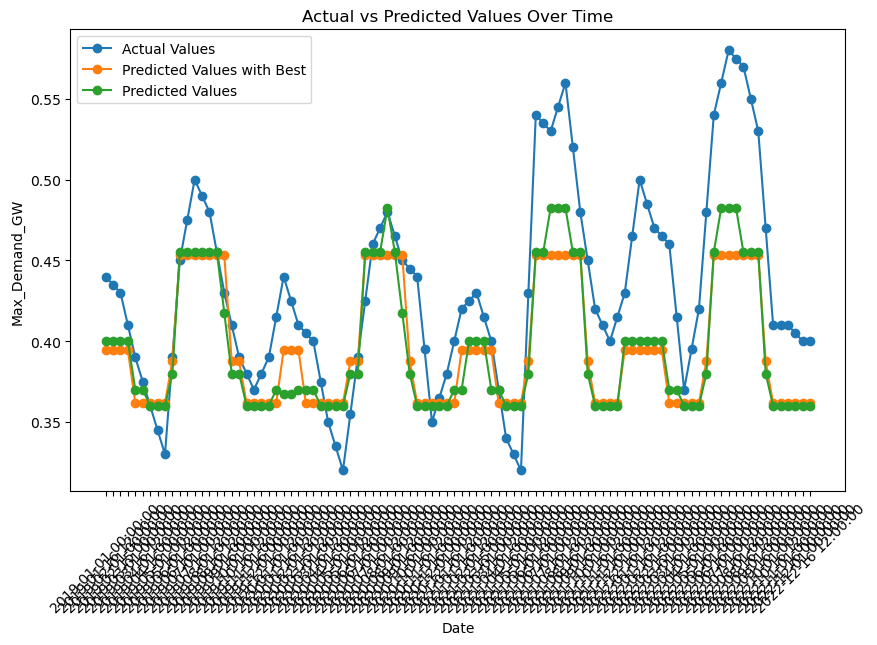

In [10]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values with Best', marker='o')

plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max_Demand_GW')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [11]:


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)




# Calculate R-squared
r2b = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred_best)



# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'New R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'New Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'New Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'New Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'New Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')

R-squared: 0.3536 (Ideal: 1)
New R-squared: 0.2711 (Ideal: 1) 

Mean Absolute Error: 0.0413 (Ideal: 0)
New Mean Absolute Error: 0.0429 (Ideal: 0) 

Mean Squared Error: 0.0025 (Ideal: 0)
New Mean Squared Error: 0.0028 (Ideal: 0) 

Root Mean Squared Error: 0.0499 (Ideal: 0)
New Root Mean Squared Error: 0.0499 (Ideal: 0) 

Explained Variance Score: 0.6794 (Ideal: 1)
New Explained Variance Score: 0.6088 (Ideal: 1)
